In [8]:
# Visualization 1: The "Class Balance" Chart
# The Forest Cover dataset is famous for being imbalanced. 
# Some trees are rare; others are common.

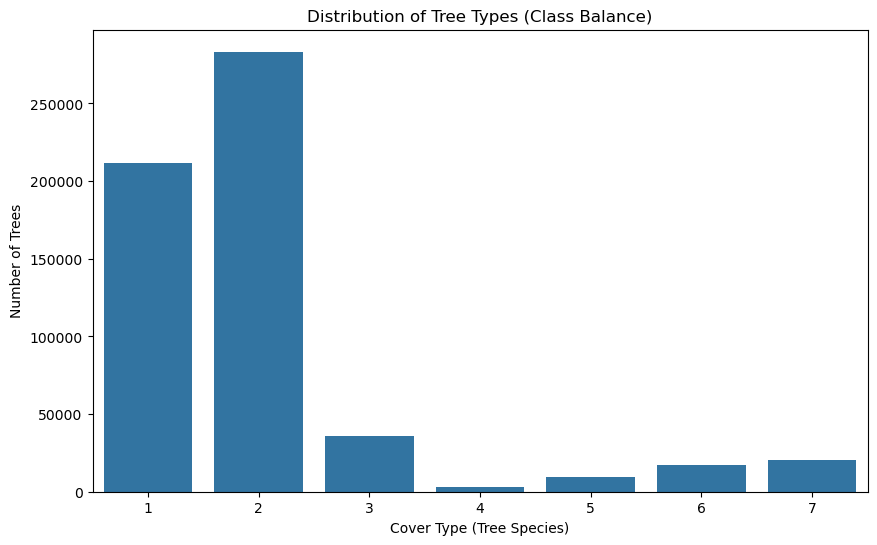

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Re-define the column names (Because the raw file doesn't have them)
cols = [
    "Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
    "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
    "Horizontal_Distance_To_Fire_Points"
]
for i in range(4):
    cols.append(f"Wilderness_Area_{i+1}")
for i in range(40):
    cols.append(f"Soil_Type_{i+1}")
cols.append("Cover_Type")

# 2. Re-Load the Data (This creates the 'df' variable)
# We use the .gz file directly as we learned earlier
df = pd.read_csv('covtype.data.gz', header=None, names=cols)

# 1. Count Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Cover_Type', data=df) # Use your original 'df' before scaling
plt.title('Distribution of Tree Types (Class Balance)')
plt.xlabel('Cover Type (Tree Species)')
plt.ylabel('Number of Trees')
plt.show()

In [23]:
# Visualization 2: Feature vs. Target (Box Plot)
# To show why the model works. 
# Show that different trees live at different elevations.

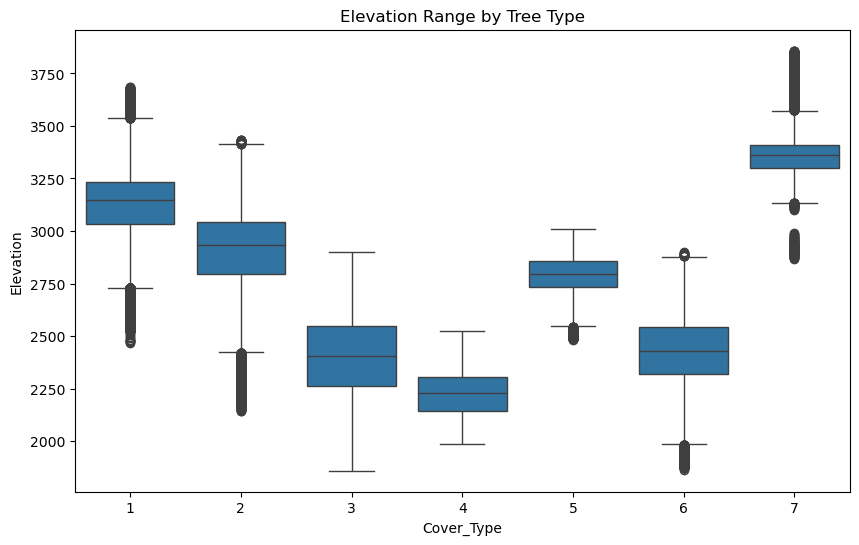

In [24]:
# 2. Box Plot (Elevation vs Tree Type)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cover_Type', y='Elevation', data=df)
plt.title('Elevation Range by Tree Type')
plt.show()

In [25]:
# Part 2: Data Preprocessing
# Manipulated the raw data to make it math-friendly.
# To visualize the "Before and After" of Scaling.
# Before Scaling: Elevation is 3000, Slope is 10. (Huge gap).
# After Scaling: Elevation is 0.8, Slope is -0.5. (Similar range)

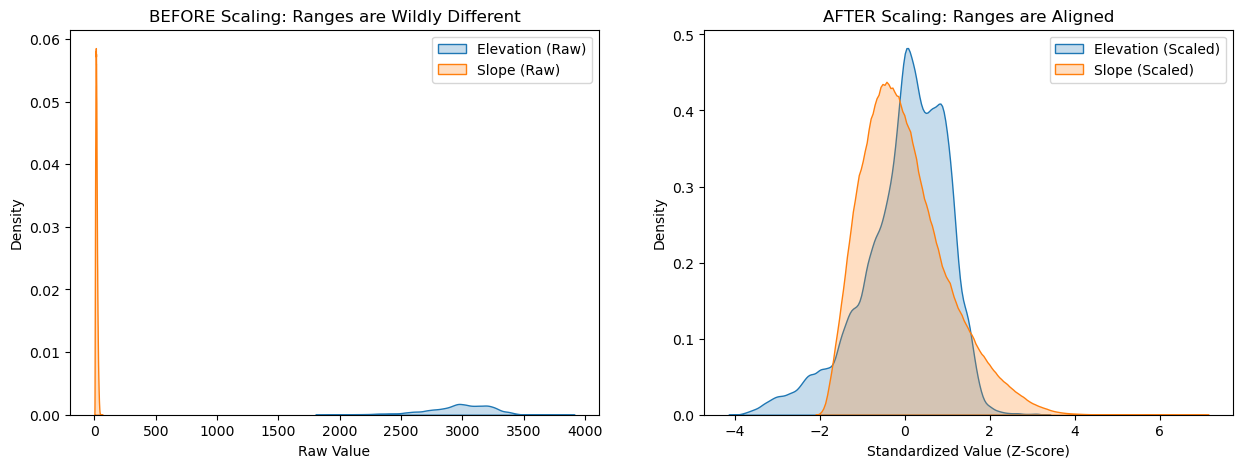

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- STEP 1: RE-CREATE THE SCALED DATA ---
# (We need to do this so 'X_train_scaled' actually exists!)

# 1. Split Features (X) and Target (y)
# We assume 'df' is already loaded from your previous cell.
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

# 2. Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Apply Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# --- STEP 2: VISUALIZE IT ---

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Before Scaling (Using raw 'df')
# We limit the range to -100 to 4000 just so the graph is readable
sns.kdeplot(df['Elevation'], ax=axes[0], label='Elevation (Raw)', fill=True)
sns.kdeplot(df['Slope'], ax=axes[0], label='Slope (Raw)', fill=True)
axes[0].set_title('BEFORE Scaling: Ranges are Wildly Different')
axes[0].set_xlabel('Raw Value')
axes[0].legend()

# Plot 2: After Scaling (Using the 'X_train_scaled' we just created)
# We convert it back to a DataFrame briefly so we can use column names
# cols[:-1] gives us all column names EXCEPT the target 'Cover_Type'
X_scaled_df = pd.DataFrame(X_train_scaled, columns=df.columns[:-1])

sns.kdeplot(X_scaled_df['Elevation'], ax=axes[1], label='Elevation (Scaled)', fill=True)
sns.kdeplot(X_scaled_df['Slope'], ax=axes[1], label='Slope (Scaled)', fill=True)
axes[1].set_title('AFTER Scaling: Ranges are Aligned')
axes[1].set_xlabel('Standardized Value (Z-Score)')
axes[1].legend()

plt.show()

In [ ]:
# Summary: What's in the notebook
# 1. The Class Count Plot (Visualizing the data).
# 2. The Box Plot (Visualizing relationships).
# 3. The Before/After Scaling Plot (Visualizing preprocessing).
# 4. Short paragraphs explaining what each graph proves (The Analysis).